In [1]:
#Code written by Sudesh V Khillare
#Libraries required are Pandas, Sklearn, Imblearn, Matplotlib, Seaborn, Numpy

In [63]:
#Loading dataset
import pandas as pd
dataset=pd.read_csv('pokemon_trainer_application_data.csv')

D:\Python\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
#Confirming Dataset Dimensions
print('Dimensions of dataset are:',dataset.shape)
dataset.head()

Dimensions of dataset are: (100000, 85)


,ApplicationStatus,ApplicationType,ApplyDate,CurrentlyEmployed,CurrentlyTrainingPokemon,CurrentlyWorkInThisRegion,GraduateSchoolGPA,GraduateSchoolGraduate,GymBadge1Pokemon,GymBadge2Pokemon,...,ReferenceRelationship3,SpokenWithCurrentBoss,TechnicalSchoolGPA,TechnicalSchoolGraduate,TotalYearsOfExp,UndergradSchoolGPA,UndergradSchoolGraduate,WorkedInThisRegion,WorkingForJobAppliedFor,hired
0,Filed Not Hired,Applicant,11/26/2013,False,NaN,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,False,NaN,0.0
1,Filed Not Hired,Applicant,11/27/2013,True,NaN,False,NaN,NaN,NaN,NaN,...,Fellow Trainer,NaN,NaN,NaN,5.0,NaN,No,False,NaN,0.0
2,Filed Not Hired,Applicant,11/22/2013,NaN,NaN,False,NaN,NaN,NaN,NaN,...,Fellow Trainer,NaN,NaN,NaN,5.0,3.0,Yes,False,NaN,0.0
3,Filed Not Hired,Applicant,11/23/2013,True,NaN,False,NaN,NaN,Seedot,NaN,...,Boss,NaN,NaN,Yes,1.0,2.4,No,False,NaN,0.0
4,New,Applicant,11/23/2013,True,NaN,False,NaN,NaN,NaN,NaN,...,Professor,NaN,NaN,NaN,3.0,3.0,No,False,NaN,NaN


Train​ ​a​ ​model​ ​that​ ​predicts​ ​whether​ ​candidates​ ​will​ ​get​ ​hired​ ​or​ ​not.

## Data Preprocessing 

In [65]:
#Checking all variables type.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 85 columns):
ApplicationStatus                                99996 non-null object
ApplicationType                                  100000 non-null object
ApplyDate                                        100000 non-null object
CurrentlyEmployed                                82596 non-null object
CurrentlyTrainingPokemon                         3911 non-null object
CurrentlyWorkInThisRegion                        92482 non-null object
GraduateSchoolGPA                                3889 non-null float64
GraduateSchoolGraduate                           9789 non-null object
GymBadge1Pokemon                                 34973 non-null object
GymBadge2Pokemon                                 16411 non-null object
GymBadge3Pokemon                                 5901 non-null object
GymBadge4Pokemon                                 1812 non-null object
GymBadgePerm1                           

In [13]:
#Statistical Features of Numerical Variabls
dataset.describe()

,GraduateSchoolGPA,HighSchoolGPA,OtherSchoolGPA,TechnicalSchoolGPA,TotalYearsOfExp,UndergradSchoolGPA,hired
count,3889.000000,27206.000000,3781.000000,10241.000000,96914.000000,24361.000000,96321.000000
mean,3.478934,3.203623,3.463853,3.477138,4.154095,3.213768,0.017213
std,0.476177,0.516601,0.482387,0.478480,3.469671,0.451540,0.130066
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.200000,3.000000,3.070000,3.000000,1.000000,3.000000,0.000000
50%,3.550000,3.200000,3.500000,3.500000,3.000000,3.200000,0.000000
75%,3.800000,3.570000,3.890000,3.900000,9.000000,3.500000,0.000000
max,4.300000,4.300000,4.200000,4.300000,10.000000,4.300000,1.000000


,Total,Percent
HiredSalaryOffer,98721,0.98721
GymBadge4Pokemon,98188,0.98188
OtherSchoolGPA,96219,0.96219
GraduateSchoolGPA,96111,0.96111
CurrentlyTrainingPokemon,96089,0.96089


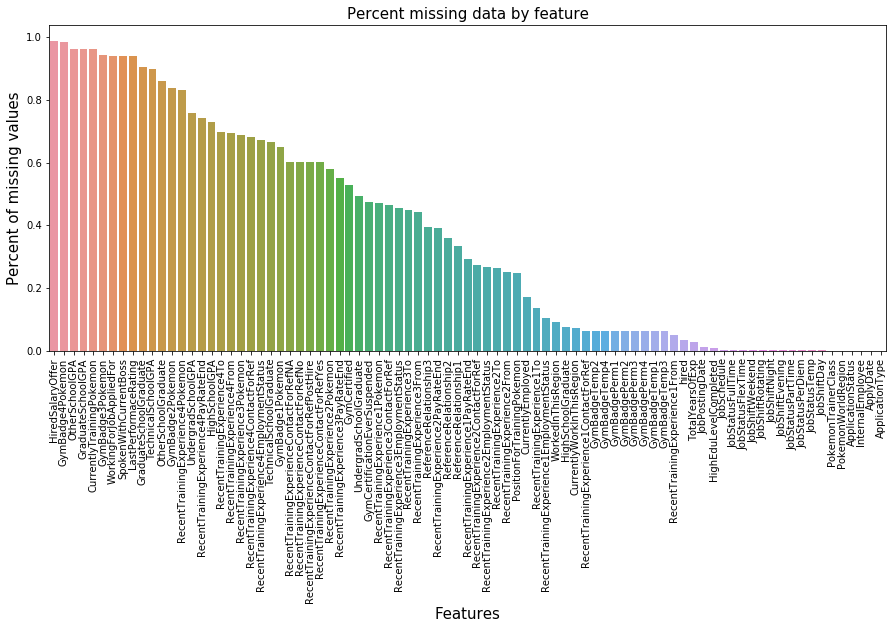

In [14]:
#Checking null and missing values values in dataset
import matplotlib.pyplot as plt
import seaborn as sns
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

1. Substituting all the missing values by mean or mode will create bias in dataset as more than 90% values are missing for top 5 variables. 
2. Hence first doing backfill menthod, but after that few columns are still having missing values thus doing forward fill again.

In [15]:
dataset.fillna(method='bfill',inplace=True)
dataset.fillna(method='ffill',inplace=True)

,Total,Percent
hired,0,0.0
JobShiftEvening,0,0.0
HighEduLevelCompleted,0,0.0
HighSchoolGPA,0,0.0
HighSchoolGraduate,0,0.0


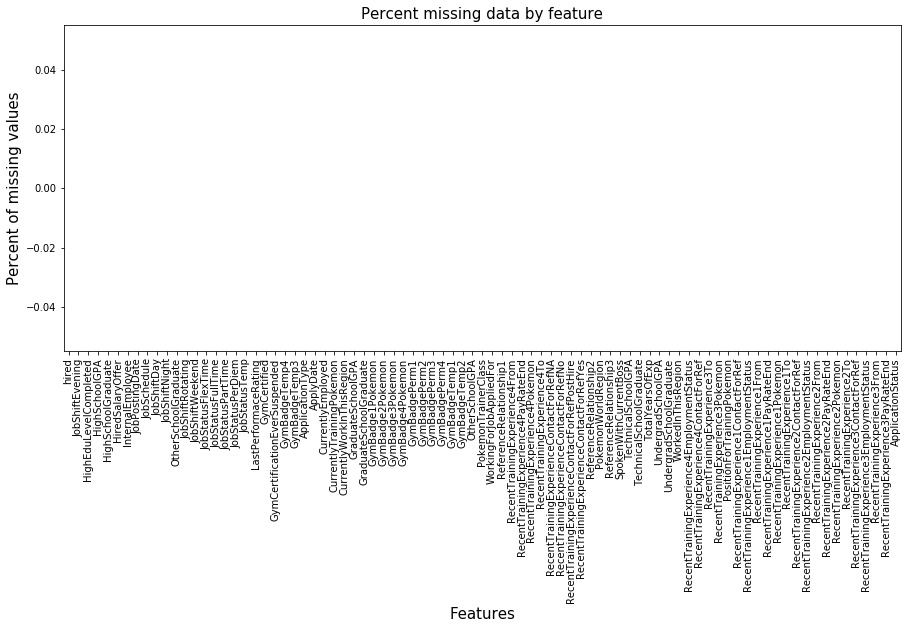

In [16]:
#Confirming if all missing values are removed
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [17]:
dataset.head()

,ApplicationStatus,ApplicationType,ApplyDate,CurrentlyEmployed,CurrentlyTrainingPokemon,CurrentlyWorkInThisRegion,GraduateSchoolGPA,GraduateSchoolGraduate,GymBadge1Pokemon,GymBadge2Pokemon,...,ReferenceRelationship3,SpokenWithCurrentBoss,TechnicalSchoolGPA,TechnicalSchoolGraduate,TotalYearsOfExp,UndergradSchoolGPA,UndergradSchoolGraduate,WorkedInThisRegion,WorkingForJobAppliedFor,hired
0,Filed Not Hired,Applicant,11/26/2013,False,Mareep,False,3.85,Yes,Seedot,Audino,...,Fellow Trainer,True,3.6,Yes,3.0,3.0,No,False,False,0.0
1,Filed Not Hired,Applicant,11/27/2013,True,Mareep,False,3.85,Yes,Seedot,Audino,...,Fellow Trainer,True,3.6,Yes,5.0,3.0,No,False,False,0.0
2,Filed Not Hired,Applicant,11/22/2013,True,Mareep,False,3.85,Yes,Seedot,Audino,...,Fellow Trainer,True,3.6,Yes,5.0,3.0,Yes,False,False,0.0
3,Filed Not Hired,Applicant,11/23/2013,True,Mareep,False,3.85,Yes,Seedot,Audino,...,Boss,True,3.6,Yes,1.0,2.4,No,False,False,0.0
4,New,Applicant,11/23/2013,True,Mareep,False,3.85,Yes,Audino,Audino,...,Professor,True,3.6,Yes,3.0,3.0,No,False,False,0.0


In [18]:
#Categorical Variables
dataset.select_dtypes(exclude=['int', 'float']).columns

Index(['ApplicationStatus', 'ApplicationType', 'ApplyDate',
       'CurrentlyEmployed', 'CurrentlyTrainingPokemon',
       'CurrentlyWorkInThisRegion', 'GraduateSchoolGraduate',
       'GymBadge1Pokemon', 'GymBadge2Pokemon', 'GymBadge3Pokemon',
       'GymBadge4Pokemon', 'GymBadgePerm1', 'GymBadgePerm2', 'GymBadgePerm3',
       'GymBadgePerm4', 'GymBadgeTemp1', 'GymBadgeTemp2', 'GymBadgeTemp3',
       'GymBadgeTemp4', 'GymCertificationEverSuspended', 'GymCertified',
       'HighEduLevelCompleted', 'HighSchoolGraduate', 'HiredSalaryOffer',
       'InternalEmployee', 'JobPostingDate', 'JobSchedule', 'JobShiftDay',
       'JobShiftEvening', 'JobShiftNight', 'JobShiftRotating',
       'JobShiftWeekend', 'JobStatusFlexTime', 'JobStatusFullTime',
       'JobStatusPartTime', 'JobStatusPerDiem', 'JobStatusTemp',
       'LastPerformaceRating', 'OtherSchoolGraduate', 'PokemonTrainerClass',
       'PokemonWorldRegion', 'PositionForTrainingPokemon',
       'RecentTrainingExperience1ContactForRef',

Now all categorical variables are converted into numeric value. This way these variables can be added into predicting models.

In [20]:
# Import label encoder 
from sklearn import preprocessing 
  
# label encoding all categorical variables
label_encoder = preprocessing.LabelEncoder()

#Storing output of all categorical column names in List
Categorical_Column_List=dataset.select_dtypes(exclude=['int', 'float']).columns

#This list is same as output of above cell. Now implementing the transformation on main dataset.
for i in Categorical_Column_List:
    dataset[i]= label_encoder.fit_transform(dataset[i]) 
    dataset[i].unique() 

In [21]:
#Confirming the changes in data
dataset.head()

,ApplicationStatus,ApplicationType,ApplyDate,CurrentlyEmployed,CurrentlyTrainingPokemon,CurrentlyWorkInThisRegion,GraduateSchoolGPA,GraduateSchoolGraduate,GymBadge1Pokemon,GymBadge2Pokemon,...,ReferenceRelationship3,SpokenWithCurrentBoss,TechnicalSchoolGPA,TechnicalSchoolGraduate,TotalYearsOfExp,UndergradSchoolGPA,UndergradSchoolGraduate,WorkedInThisRegion,WorkingForJobAppliedFor,hired
0,5,0,405,0,13,0,3.85,1,24,1,...,1,1,3.6,1,3.0,3.0,0,0,0,0.0
1,5,0,410,1,13,0,3.85,1,24,1,...,1,1,3.6,1,5.0,3.0,0,0,0,0.0
2,5,0,385,1,13,0,3.85,1,24,1,...,1,1,3.6,1,5.0,3.0,1,0,0,0.0
3,5,0,390,1,13,0,3.85,1,24,1,...,0,1,3.6,1,1.0,2.4,0,0,0,0.0
4,7,0,390,1,13,0,3.85,1,2,1,...,5,1,3.6,1,3.0,3.0,0,0,0,0.0


In [22]:
#Now calculating the correlation and filtering values w.r.t. only Hired Variable.
Correlation=dataset.corr()
Correlation["hired"].sort_values()

ApplicationStatus                               -0.290190
JobShiftEvening                                 -0.051471
JobShiftWeekend                                 -0.041326
JobStatusPartTime                               -0.039543
JobShiftNight                                   -0.036907
JobShiftRotating                                -0.030065
JobShiftDay                                     -0.023202
JobStatusFullTime                               -0.023015
JobStatusTemp                                   -0.020419
JobStatusFlexTime                               -0.015164
RecentTrainingExperience1ContactForRef          -0.014277
HighEduLevelCompleted                           -0.013419
RecentTrainingExperience1EmploymentStatus       -0.012411
PokemonTrainerClass                             -0.009537
RecentTrainingExperience3EmploymentStatus       -0.009384
JobSchedule                                     -0.007180
RecentTrainingExperience2EmploymentStatus       -0.006583
GymBadge1Pokem

Below are negatively correlated factors. Means increase in these values will reduce the chances of getting hired
'ApplicationStatus','JobShiftEvening','JobShiftWeekend','JobStatusPartTime','JobShiftNight','JobShiftRotating', 'JobShiftDay','JobStatusFullTime','JobStatusTemp','JobStatusFlexTime','RecentTrainingExperience1ContactForRef', 'HighEduLevelCompleted','RecentTrainingExperience1EmploymentStatus',''

Below are positevely correlated factors. Means increase in these values will increase the chances of getting hired 
'WorkingForJobAppliedFor','GraduateSchoolGraduate','SpokenWithCurrentBoss','TechnicalSchoolGraduate','GymBadgePerm2',
'UndergradSchoolGPA','HighSchoolGPA','GymCertified','CurrentlyEmployed','CurrentlyWorkInThisRegion','WorkedInThisRegion',
'UndergradSchoolGraduate','TotalYearsOfExp','GymBadgePerm1','InternalEmployee','ApplicationType'

These set of Variables is having more than 1% of correlation with Target Variable i.e. 'hired'. Hence choosing these variables from set of all 85 variables.

Above values are only for reference idea of correlation, as individual values associted with each category is calculated by Label Encoding. And the problem with Label Encoding is it doesn't assign the values as per the importance. One possible solution for this problme is use One Hot encoding, but considering the levels in each variable, it will generate extremly sparse matrix. Hence continuing with Label Encoding.

In [23]:
X=dataset[['ApplicationStatus','JobShiftEvening','JobShiftWeekend','JobStatusPartTime','JobShiftNight','JobShiftRotating','JobShiftDay','JobStatusFullTime','JobStatusTemp','JobStatusFlexTime','RecentTrainingExperience1ContactForRef','HighEduLevelCompleted','RecentTrainingExperience1EmploymentStatus','WorkingForJobAppliedFor','GraduateSchoolGraduate','SpokenWithCurrentBoss','TechnicalSchoolGraduate','GymBadgePerm2','UndergradSchoolGPA','HighSchoolGPA','GymCertified','CurrentlyEmployed','CurrentlyWorkInThisRegion','WorkedInThisRegion','UndergradSchoolGraduate','TotalYearsOfExp','GymBadgePerm1','InternalEmployee','ApplicationType']]
Y=dataset['hired']

#Dataset split is 80% Training and 20% Test
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
#We can confirm here that dataset is extremly skewed. 
Y_Train.value_counts()

0.0    78569
1.0     1431
Name: hired, dtype: int64

Using SMOTE oversampling technique, I'm generating similar datapoints in only training set to make model more robust.

In [25]:
#To handle the data imbalance, implementing SMOTE oversampling technique.
import numpy as np
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_Resampled, Y_Resampled=sm.fit_sample(X_Train,Y_Train)
unique, counts=np.unique(Y_Resampled,return_counts= True)

#Confirming if data imbalance is handled or not
print(unique, counts)

[0. 1.] [78569 78569]


In [26]:
X_Test.head()

,ApplicationStatus,JobShiftEvening,JobShiftWeekend,JobStatusPartTime,JobShiftNight,JobShiftRotating,JobShiftDay,JobStatusFullTime,JobStatusTemp,JobStatusFlexTime,...,HighSchoolGPA,GymCertified,CurrentlyEmployed,CurrentlyWorkInThisRegion,WorkedInThisRegion,UndergradSchoolGraduate,TotalYearsOfExp,GymBadgePerm1,InternalEmployee,ApplicationType
75721,5,1,1,1,1,1,1,1,1,1,...,3.0,1,0,0,0,0,1.0,0,0,0
80184,5,0,0,0,0,0,1,1,0,0,...,3.5,0,1,0,0,0,1.0,1,0,0
19864,5,0,0,1,0,0,1,0,0,1,...,3.8,1,1,0,0,0,10.0,1,1,0
76699,5,1,1,1,1,1,1,1,1,1,...,3.8,0,0,0,0,0,5.0,1,0,0
92991,6,1,1,1,1,1,1,1,1,1,...,3.8,0,0,0,0,0,1.0,0,0,0


In [ ]:
#Iloc
#X = data.iloc[:,1:]

## Model Building 

As dataset is extremly skewed, Accuracy can't be correct measure the model performance. Hence, I'm refering Confusion Matrix and Classification Report to evaluate model performance. 

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
#Function to Plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### 1. Random Forest 

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
Random_Forest=RandomForestClassifier(max_depth=10)
model1=Random_Forest.fit(X_Resampled, Y_Resampled)
Y_Pred_RF=Random_Forest.predict(X_Test)
print('\n')
print("Classification Report for Random Forest Classifier")
print('\n')
print(classification_report(Y_Test,Y_Pred_RF))
print('\n')
print("Confusion Matrix for Random Forest Classifier")
pd.crosstab(Y_Test,Y_Pred_RF,rownames=['True'],colnames=['Predicted'],margins=True)

D:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




Classification Report for Random Forest Classifier


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19634
         1.0       0.93      0.92      0.93       366

   micro avg       1.00      1.00      1.00     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       1.00      1.00      1.00     20000



Confusion Matrix for Random Forest Classifier


Predicted,0.0,1.0,All
True,,,
0.0,19610,24,19634
1.0,28,338,366
All,19638,362,20000


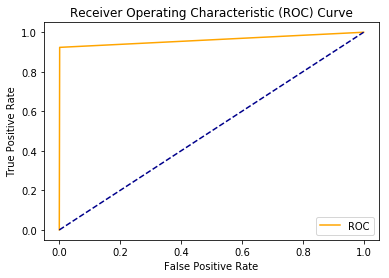

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(Y_Test,Y_Pred_RF)
plot_roc_curve(fpr, tpr)

In [61]:
auc = roc_auc_score(Y_Test,Y_Pred_RF)
print('AUC Score for Random Forest Classifier: %.2f' % auc)

AUC Score for Random Forest Classifier: 0.96


### 2. Extra Tree Classifier 

In [39]:
#Extra Tree Classfier
from sklearn.ensemble import ExtraTreesClassifier
Extra_Tree=ExtraTreesClassifier(max_depth=10)
model2=Extra_Tree.fit(X_Resampled, Y_Resampled)
Y_Pred_ET=Extra_Tree.predict(X_Test)
print('\n')
print("Classification Report for Extra Tree Classifier")
print('\n')
print(classification_report(Y_Test,Y_Pred_ET))
print('\n')
print("Confusion Matrix for Extra Tree Classifier")
pd.crosstab(Y_Test,Y_Pred_ET,rownames=['True'],colnames=['Predicted'],margins=True)

D:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




Classification Report for Extra Tree Classifier


              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     19634
         1.0       0.19      0.56      0.28       366

   micro avg       0.95      0.95      0.95     20000
   macro avg       0.59      0.76      0.63     20000
weighted avg       0.98      0.95      0.96     20000



Confusion Matrix for Extra Tree Classifier


Predicted,0.0,1.0,All
True,,,
0.0,18739,895,19634
1.0,162,204,366
All,18901,1099,20000


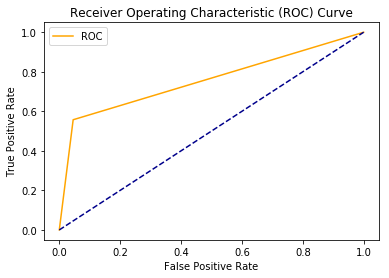

In [40]:
fpr, tpr, thresholds = roc_curve(Y_Test,Y_Pred_ET)
plot_roc_curve(fpr, tpr)

In [57]:
auc = roc_auc_score(Y_Test,Y_Pred_ET)
print('AUC Score for Extra Tree Classifier: %.2f' % auc)

AUC Score for Extra Tree Classifier: 0.76


### 3. Gradient Boosting Classifier 

In [41]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
Grad_Boost=GradientBoostingClassifier(max_depth=10)
model3=Grad_Boost.fit(X_Resampled, Y_Resampled)
Y_Pred_Grad=Grad_Boost.predict(X_Test)
print('\n')
print("Classification Report for Gradient Boosting Classifier")
print('\n')
print(classification_report(Y_Test,Y_Pred_Grad))
print('\n')
print("Confusion Matrix for Gradient Boosting Classifier")
pd.crosstab(Y_Test,Y_Pred_Grad,rownames=['True'],colnames=['Predicted'],margins=True)




Classification Report for Gradient Boosting Classifier


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19634
         1.0       0.99      0.92      0.95       366

   micro avg       1.00      1.00      1.00     20000
   macro avg       0.99      0.96      0.98     20000
weighted avg       1.00      1.00      1.00     20000



Confusion Matrix for Gradient Boosting Classifier


Predicted,0.0,1.0,All
True,,,
0.0,19630,4,19634
1.0,28,338,366
All,19658,342,20000


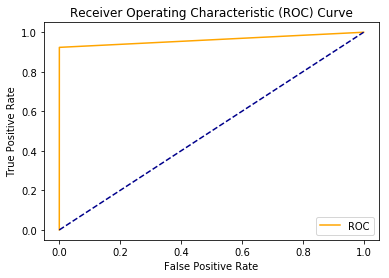

In [42]:
fpr, tpr, thresholds = roc_curve(Y_Test,Y_Pred_Grad)
plot_roc_curve(fpr, tpr)

In [56]:
auc = roc_auc_score(Y_Test,Y_Pred_Grad)
print('AUC Score for Gradient Boosting: %.2f' % auc)

AUC Score for Gradient Boosting: 0.96


### 4. Logistic Regression

In [44]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Logistic_Regression=LogisticRegression(random_state=42)
model4=Logistic_Regression.fit(X_Resampled,Y_Resampled)
Y_Pred_Log=Logistic_Regression.predict(X_Test)

print('\n')
print("Classification Report for Logistic Regression Classifier")
print('\n')
print(classification_report(Y_Test,Y_Pred_Log))
print('\n')
print("Confusion Matrix for Logistic Regression Classifier")
pd.crosstab(Y_Test,Y_Pred_Log,rownames=['True'],colnames=['Predicted'],margins=True)



D:\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




Classification Report for Logistic Regression Classifier


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     19634
         1.0       0.42      0.96      0.59       366

   micro avg       0.98      0.98      0.98     20000
   macro avg       0.71      0.97      0.79     20000
weighted avg       0.99      0.98      0.98     20000



Confusion Matrix for Logistic Regression Classifier


Predicted,0.0,1.0,All
True,,,
0.0,19152,482,19634
1.0,15,351,366
All,19167,833,20000


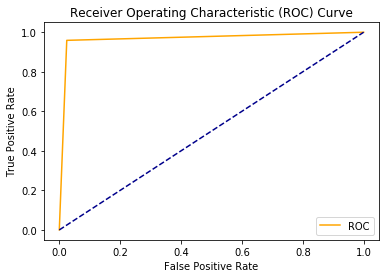

In [45]:
fpr, tpr, thresholds = roc_curve(Y_Test,Y_Pred_Log)
plot_roc_curve(fpr, tpr)

In [55]:
auc = roc_auc_score(Y_Test,Y_Pred_Log)
print('AUC Score for Logistic Regression: %.2f' % auc)

AUC Score for Logistic Regression: 0.97


### 5. Decision Tree Classifier 

In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
Decision_Tree=DecisionTreeClassifier(random_state=42)
model5=Decision_Tree.fit(X_Resampled,Y_Resampled)
Y_Pred_DT=Decision_Tree.predict(X_Test)
print('\n')
print("Classification Report for Decision Tree Classifier")
print('\n')
print(classification_report(Y_Test,Y_Pred_DT))
print('\n')
print("Confusion Matrix for Decision Tree Classifier")
pd.crosstab(Y_Test,Y_Pred_DT,rownames=['True'],colnames=['Predicted'],margins=True)





Classification Report for Decision Tree Classifier


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19634
         1.0       0.90      0.94      0.92       366

   micro avg       1.00      1.00      1.00     20000
   macro avg       0.95      0.97      0.96     20000
weighted avg       1.00      1.00      1.00     20000



Confusion Matrix for Decision Tree Classifier


Predicted,0.0,1.0,All
True,,,
0.0,19597,37,19634
1.0,22,344,366
All,19619,381,20000


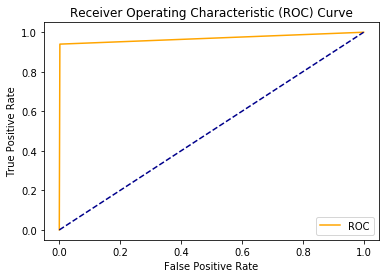

In [47]:
fpr, tpr, thresholds = roc_curve(Y_Test,Y_Pred_DT)
plot_roc_curve(fpr, tpr)
auc = roc_auc_score(Y_Test,Y_Pred_DT)
print('AUC: %.2f' % auc)

In [52]:
auc = roc_auc_score(Y_Test,Y_Pred_DT)
print('AUC Score for Decision Tree: %.2f' % auc)

AUC Score for Decision Tree: 0.97


### 6. Voting Classifier 

Voting classifier consider output of Random Forest, Gradient Boosting and Decision Tree and then choose the class majority Voted for. Hence it is slightly more accurate as compared to others.

In [48]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
Voting_Classifier=VotingClassifier(estimators=[('Random_Forest',Random_Forest),('Grad_Boost',Grad_Boost),('Decision_Tree',Decision_Tree)],
                                  voting='hard')

for clf in (Random_Forest,Grad_Boost,Decision_Tree,Voting_Classifier):
    clf.fit(X_Resampled,Y_Resampled)
    Voting_Prediction=clf.predict(X_Test)

In [49]:
print('\n')
print("Classification Report for Voting Classifier")
print('\n')
print(classification_report(Y_Test,Voting_Prediction))
print('\n')
print("Confusion Matrix for Voting Classifier")
pd.crosstab(Y_Test,Voting_Prediction,rownames=['True'],colnames=['Predicted'],margins=True)



Classification Report for Voting Classifier


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19634
         1.0       0.97      0.93      0.95       366

   micro avg       1.00      1.00      1.00     20000
   macro avg       0.99      0.96      0.98     20000
weighted avg       1.00      1.00      1.00     20000



Confusion Matrix for Voting Classifier


Predicted,0.0,1.0,All
True,,,
0.0,19625,9,19634
1.0,26,340,366
All,19651,349,20000


I have identified 342 correct hired and 19622 not hired candidate. While 12 non hired candidates are misclassified as hired and 24 hired candidate are misclassified as non hired. Overall by above model I am able to predict 93% correct hired candidates with 97% precision. 

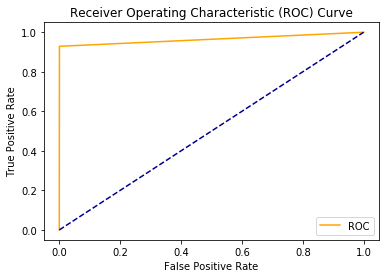

In [50]:
fpr, tpr, thresholds = roc_curve(Y_Test,Voting_Prediction)
plot_roc_curve(fpr, tpr)

In [53]:
auc = roc_auc_score(Y_Test,Voting_Prediction)
print('AUC Score for Voting Classifier: %.2f' % auc)

AUC Score for Voting Classifier: 0.96


In [ ]:
#Code by Sudesh V Khillare